In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import pchip_interpolate
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
from scipy.integrate import trapz

# from scipy import sparse
from math import atan2, pi, sin, cos, sqrt

In [2]:
rho_sto_ol = np.load('/home/curry/Documents/NOMeanSquare/data/rho_sto_ol.npy')
v_sto_ol = np.load('/home/curry/Documents/NOMeanSquare/data/v_sto_ol.npy')
U_sf_sto_ol = np.load('/home/curry/Documents/NOMeanSquare/data/U_sf_sto_ol.npy')
uv_sf_norm_sto_ol = np.load('/home/curry/Documents/NOMeanSquare/data/uv_sf_norm_sto_ol.npy')

rho_sto = np.load('/home/curry/Documents/NOMeanSquare/data/rho_sto.npy')
v_sto = np.load('/home/curry/Documents/NOMeanSquare/data/v_sto.npy')
U_sf_sto = np.load('/home/curry/Documents/NOMeanSquare/data/U_sf_sto.npy')
uv_sf_norm_sto = np.load('/home/curry/Documents/NOMeanSquare/data/uv_sf_norm_sto.npy')

rho_num = np.load('/home/curry/Documents/NOMeanSquare/data/rho_num.npy')
v_num = np.load('/home/curry/Documents/NOMeanSquare/data/v_num.npy')
U_sf_num = np.load('/home/curry/Documents/NOMeanSquare/data/U_sf_num.npy')
uv_sf_norm_num = np.load('/home/curry/Documents/NOMeanSquare/data/uv_sf_norm_num.npy')

rho_para2K = np.load('/home/curry/Documents/NOMeanSquare/data/rho_para2K.npy')
v_para2K = np.load('/home/curry/Documents/NOMeanSquare/data/v_para2K.npy')
U_sf_para2K = np.load('/home/curry/Documents/NOMeanSquare/data/U_sf_para2K.npy')
uv_sf_norm_para2K = np.load('/home/curry/Documents/NOMeanSquare/data/uv_sf_norm_para2K.npy')

Kvu_no = np.load('/home/curry/Documents/NOMeanSquare/data/Kvu_no.npy')
Kvv_no = np.load('/home/curry/Documents/NOMeanSquare/data/Kvv_no.npy')

Kvu_num = np.load('/home/curry/Documents/NOMeanSquare/data/Kvu_num.npy')
Kvv_num = np.load('/home/curry/Documents/NOMeanSquare/data/Kvv_num.npy')

simTseq = np.load('/home/curry/Documents/NOMeanSquare/data/simTseq.npy')
Tseq = np.load('/home/curry/Documents/NOMeanSquare/data/Tseq.npy')
pStates = np.load('/home/curry/Documents/NOMeanSquare/data/pStates.npy')

t_log = np.load('/home/curry/Documents/NOMeanSquare/data/t_log.npy')
xspanT = np.load('/home/curry/Documents/NOMeanSquare/data/xspanT.npy')


rho_err = rho_sto - rho_para2K
v_err = v_sto - v_para2K
U_sf_err = U_sf_sto - U_sf_para2K
uv_sf_norm_err = uv_sf_norm_sto - uv_sf_norm_para2K

Kvu_no[Kvu_no==0] = np.nan
Kvv_no[Kvv_no==0] = np.nan

Kvu_num[Kvu_num==0] = np.nan
Kvv_num[Kvv_num==0] = np.nan

error_Kvu = Kvu_no - Kvu_num
error_Kvv = Kvv_no - Kvv_num


### save to .mat form

In [3]:
from scipy.io import savemat
name = 'rho_sto_ol'
savemat('matdata/'+ name +'.mat', {name:rho_sto_ol})
name = 'v_sto_ol'
savemat('matdata/'+ name +'.mat', {name:v_sto_ol})
name = 'U_sf_sto_ol'
savemat('matdata/'+ name +'.mat', {name:U_sf_sto_ol})
name = 'uv_sf_norm_sto_ol'
savemat('matdata/'+ name +'.mat', {name:uv_sf_norm_sto_ol})

name = 'rho_sto'
savemat('matdata/'+ name +'.mat', {name:rho_sto})
name = 'v_sto'
savemat('matdata/'+ name +'.mat', {name:v_sto})
name = 'U_sf_sto'
savemat('matdata/'+ name +'.mat', {name:U_sf_sto})
name = 'uv_sf_norm_sto'
savemat('matdata/'+ name +'.mat', {name:uv_sf_norm_sto})

name = 'rho_num'
savemat('matdata/'+ name +'.mat', {name:rho_num})
name = 'v_num'
savemat('matdata/'+ name +'.mat', {name:v_num})
name = 'U_sf_num'
savemat('matdata/'+ name +'.mat', {name:U_sf_num})
name = 'uv_sf_norm_num'
savemat('matdata/'+ name +'.mat', {name:uv_sf_norm_num})


name = 'rho_para2K'
savemat('matdata/'+ name +'.mat', {name:rho_para2K})
name = 'v_para2K'
savemat('matdata/'+ name +'.mat', {name:v_para2K})
name = 'U_sf_para2K'
savemat('matdata/'+ name +'.mat', {name:U_sf_para2K})
name = 'uv_sf_norm_para2K'
savemat('matdata/'+ name +'.mat', {name:uv_sf_norm_para2K})


name = 'Kvu_no'
savemat('matdata/'+ name +'.mat', {name:Kvu_no})
name = 'Kvv_no'
savemat('matdata/'+ name +'.mat', {name:Kvv_no})

name = 'Kvu_num'
savemat('matdata/'+ name +'.mat', {name:Kvu_num})
name = 'Kvv_num'
savemat('matdata/'+ name +'.mat', {name:Kvv_num})

name = 'simTseq'
savemat('matdata/'+ name +'.mat', {name:simTseq})
name = 'Tseq'
savemat('matdata/'+ name +'.mat', {name:Tseq})
name = 'pStates'
savemat('matdata/'+ name +'.mat', {name:pStates})

name = 't_log'
savemat('matdata/'+ name +'.mat', {name:t_log})
name = 'xspanT'
savemat('matdata/'+ name +'.mat', {name:xspanT})

savemat('matdata/rho_err.mat', {'rho_err':rho_err})
savemat('matdata/v_err.mat', {'v_err':v_err})
savemat('matdata/U_sf_err.mat', {'U_sf_err':U_sf_err})
savemat('matdata/uv_sf_norm_err.mat', {'uv_sf_norm_err':uv_sf_norm_err})
savemat('matdata/error_Kvu.mat', {'error_Kvu':error_Kvu})
savemat('matdata/error_Kvv.mat', {'error_Kvv':error_Kvv})


In [4]:
class Struct:
    pass

sys = Struct()

sys.RGB_color1 = '#1f77b4'
sys.RGB_color2 = '#ff7f0e'
sys.RGB_color3 = '#2ca02c'
sys.style1 = '-'
sys.style2 = '--'
sys.style3 = '-.'
sys.xspanT = xspanT
sys.L = 500
sys.figsize = [6.4, 6]
sys.fontsize = 14
sys.fontsize_legend = 12

### Plot Markov state


In [5]:
colorlist=["red","blue","green","purple","black"]
# colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'purple']
# colorlist = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
linestyles=["-","--","-","-","-."]
legendlist=[r"$\rho^\star=90$", r"$\rho^\star=118$", r"$\rho^\star=120$", r"$\rho^\star=122$", r"$\rho^\star=150$"]

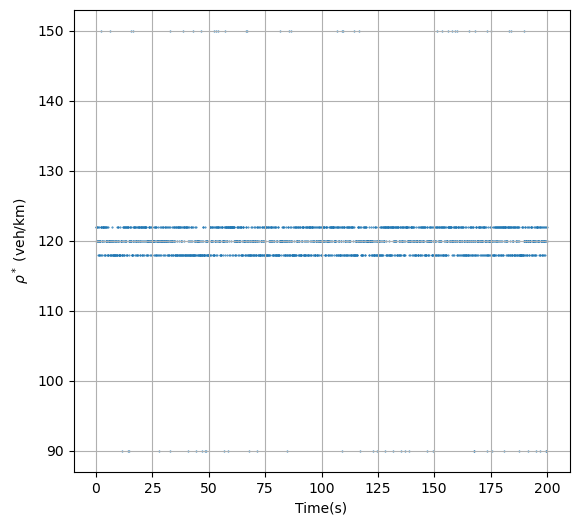

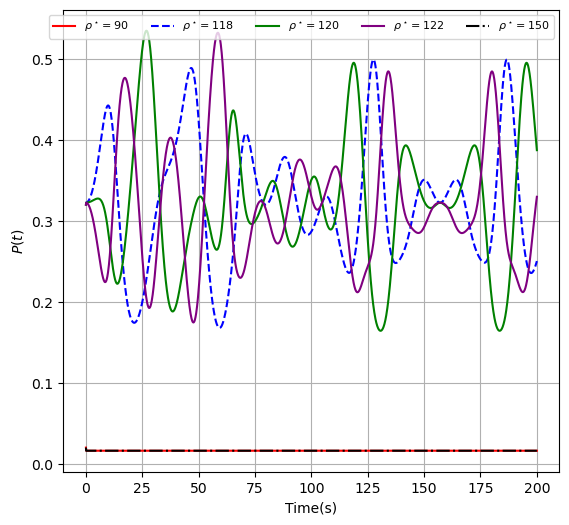

In [6]:
fig = plt.figure(figsize=sys.figsize)
plt.scatter(Tseq,simTseq*1000,s=0.2)
plt.xlabel("Time(s)")
plt.ylabel(r'$\rho^*$ (veh/km)')
plt.grid()
plt.savefig("image/simTseq.pdf", dpi = 300)
plt.show()

fig = plt.figure(figsize=sys.figsize)
## Plot
for k in range(5):
    plt.plot(Tseq,pStates[k],label=legendlist[k],color=colorlist[k],linestyle=linestyles[k])
plt.legend(loc='best', fontsize=8,ncols=5)
plt.xlabel("Time(s)")
plt.ylabel(r'$P(t)$')
plt.grid()
plt.savefig("image/Pstates.pdf", dpi = 300)
plt.show()

### Plot kernels

#### Plot NO kernels

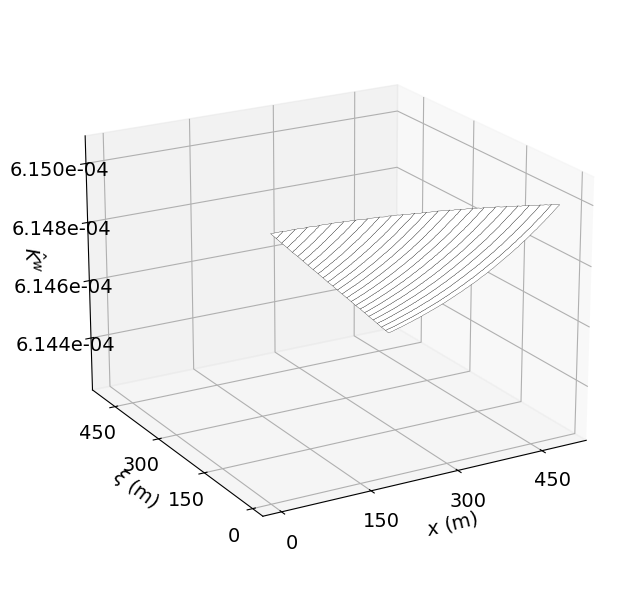

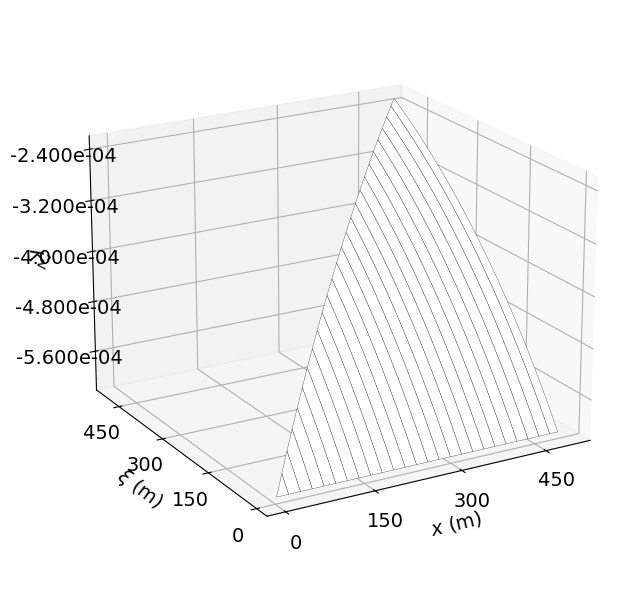

In [7]:
name = 'no'
fig = plt.figure(figsize=sys.figsize)
ax = fig.add_subplot(projection='3d')
X_arr, Xi_arr = np.meshgrid(sys.xspanT, sys.xspanT)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, Xi_arr, Kvu_no, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel(r'$x$ (m)', fontsize=sys.fontsize)
ax.set_ylabel(r'$\xi$ (m)', fontsize=sys.fontsize)
ax.set_zlabel(r'$\hat{K}^w$', fontsize=sys.fontsize)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.3e}'.format(x)))
ax.xaxis.set_tick_params(labelsize=sys.fontsize)
ax.yaxis.set_tick_params(labelsize=sys.fontsize)
ax.zaxis.set_tick_params(labelsize=sys.fontsize)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ax.view_init(elev=20, azim=-120)
# ax.invert_xaxis()
plt.tight_layout()
plt.savefig('image/'+name+'_Kvu.pdf', dpi = 300)
plt.show()

fig = plt.figure(figsize=sys.figsize)
ax = fig.add_subplot(projection='3d')
X_arr, Xi_arr = np.meshgrid(sys.xspanT, sys.xspanT)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, Xi_arr, Kvv_no, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel(r'$x$ (m)', fontsize=sys.fontsize)
ax.set_ylabel(r'$\xi$ (m)', fontsize=sys.fontsize)
ax.set_zlabel(r'$\hat{K}^v$', fontsize=sys.fontsize)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.3e}'.format(x)))
ax.xaxis.set_tick_params(labelsize=sys.fontsize)
ax.yaxis.set_tick_params(labelsize=sys.fontsize)
ax.zaxis.set_tick_params(labelsize=sys.fontsize)
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
ax.view_init(elev=20, azim=-120)
# ax.invert_xaxis()
plt.tight_layout()
plt.savefig('image/'+name+'_Kvv.pdf', dpi = 300)
plt.show()

#### Plot numerical kernel

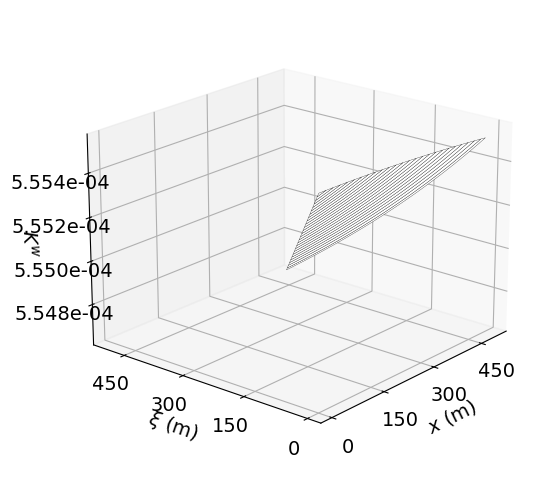

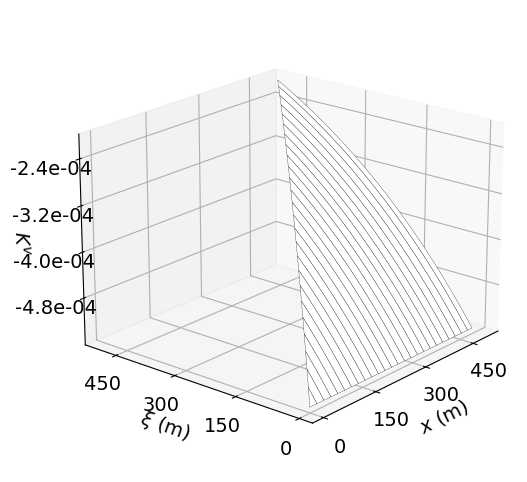

In [8]:
name = "num"

fig = plt.figure(figsize=sys.figsize)
ax = fig.add_subplot(projection='3d')
X_arr, Xi_arr = np.meshgrid(sys.xspanT, sys.xspanT)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, Xi_arr, Kvu_num, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel(r'$x$ (m)',fontsize=sys.fontsize)
ax.set_ylabel(r'$\xi$ (m)',fontsize=sys.fontsize)
ax.set_zlabel(r'$K^w$',fontsize=sys.fontsize)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.3e}'.format(x)))
ax.xaxis.set_tick_params(labelsize=sys.fontsize)
ax.yaxis.set_tick_params(labelsize=sys.fontsize)
ax.zaxis.set_tick_params(labelsize=sys.fontsize)
ax.view_init(elev=20, azim=-140)
# ax.invert_xaxis()
plt.savefig('image/'+name+'_Kvu.pdf', dpi = 300)
plt.show()

fig = plt.figure(figsize=sys.figsize)
ax = fig.add_subplot(projection='3d')
X_arr, Xi_arr = np.meshgrid(sys.xspanT, sys.xspanT)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, Xi_arr, Kvv_num, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel(r'$x$ (m)',fontsize=sys.fontsize)
ax.set_ylabel(r'$\xi$ (m)',fontsize=sys.fontsize)
ax.set_zlabel(r'$K^v$',fontsize=sys.fontsize)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1e}'.format(x)))
ax.xaxis.set_tick_params(labelsize=sys.fontsize)
ax.yaxis.set_tick_params(labelsize=sys.fontsize)
ax.zaxis.set_tick_params(labelsize=sys.fontsize)
ax.view_init(elev=20, azim=-140)
# ax.invert_xaxis()
plt.savefig('image/'+name+'_Kvv.pdf', dpi = 300)
plt.show()

#### Plot kernel error percentage

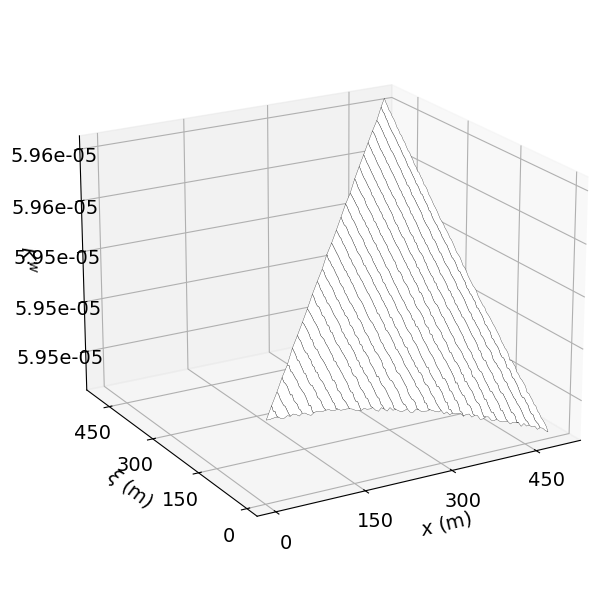

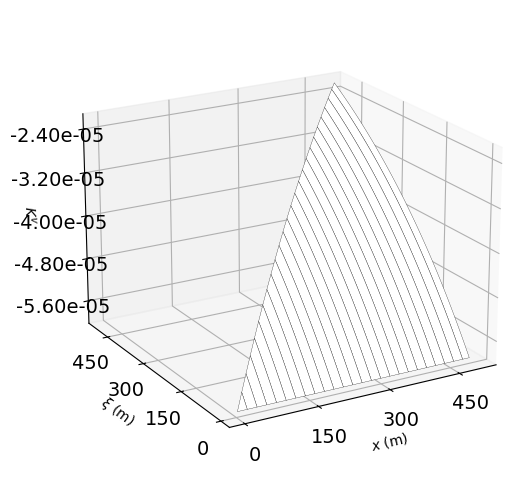

In [9]:
name = "err"
fig = plt.figure(figsize=sys.figsize)
ax = fig.add_subplot(projection='3d')
X_arr, Xi_arr = np.meshgrid(sys.xspanT, sys.xspanT)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, Xi_arr, error_Kvu, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel(r'$x$ (m)',fontsize=sys.fontsize)
ax.set_ylabel(r'$\xi$ (m)',fontsize=sys.fontsize)
ax.set_zlabel(r'$K^w$',fontsize=sys.fontsize)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2e}'.format(x)))
ax.xaxis.set_tick_params(labelsize=sys.fontsize)
ax.yaxis.set_tick_params(labelsize=sys.fontsize)
ax.zaxis.set_tick_params(labelsize=sys.fontsize)
ax.view_init(elev=20, azim=-120)
# ax.invert_xaxis()
plt.tight_layout()
plt.savefig('image/'+name+'_Kvu.pdf', dpi = 300)
plt.show()

fig = plt.figure(figsize=[6.4, 5])
ax = fig.add_subplot(projection='3d')
X_arr, Xi_arr = np.meshgrid(sys.xspanT, sys.xspanT)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, Xi_arr, error_Kvv, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel(r'$x$ (m)')
ax.set_ylabel(r'$\xi$ (m)')
ax.set_zlabel(r'$K^v$')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2e}'.format(x)))
ax.xaxis.set_tick_params(labelsize=sys.fontsize)
ax.yaxis.set_tick_params(labelsize=sys.fontsize)
ax.zaxis.set_tick_params(labelsize=sys.fontsize)
ax.view_init(elev=20, azim=-120)
# ax.invert_xaxis()
plt.tight_layout()
plt.savefig('image/'+name+'_Kvv.pdf', dpi = 300)
plt.show()

### Plot $\rho$ , $v$ results

#### Norm compare

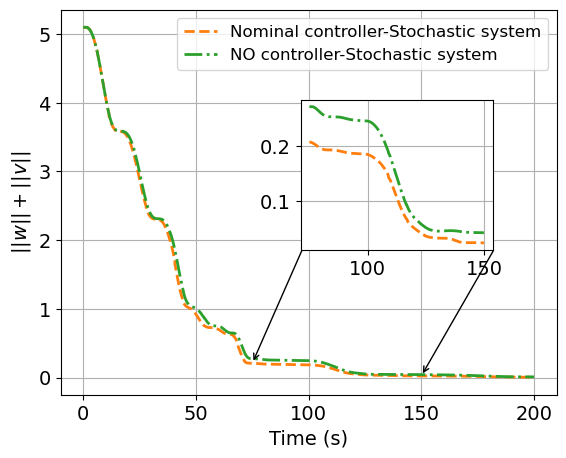

In [10]:
name = 'Norm_compare'
# Norm
fig = plt.figure(figsize=[6.4, 5])
ax1 = plt.axes()
# ax1.plot(t_log, np.zeros_like(t_log), 'k', linewidth=2)
ax1.plot(t_log, uv_sf_norm_sto, sys.style2, color=sys.RGB_color2, linewidth=2,label='Nominal controller-Stochastic system')
ax1.plot(t_log, uv_sf_norm_para2K, sys.style3, color=sys.RGB_color3, linewidth=2,label='NO controller-Stochastic system')
ax1.xaxis.set_tick_params(labelsize=sys.fontsize)
ax1.yaxis.set_tick_params(labelsize=sys.fontsize)

ax1.grid()
plt.xlabel('Time (s)', fontsize=sys.fontsize)
plt.ylabel(r'$||w||+||v||$', fontsize=sys.fontsize)
plt.legend(loc='best', fontsize=sys.fontsize_legend,ncol=1)

ax2 = plt.axes([0.5, 0.4, 0.3, 0.3])
ax2.plot(t_log[750:1500],uv_sf_norm_sto[750:1500], sys.style2, color=sys.RGB_color2, linewidth=2)
ax2.plot(t_log[750:1500],uv_sf_norm_para2K[750:1500], sys.style3, color=sys.RGB_color3, linewidth=2)
ax2.xaxis.set_tick_params(labelsize=sys.fontsize)
ax2.yaxis.set_tick_params(labelsize=sys.fontsize)
ax2.grid()
ax1.annotate("",
            xy=(t_log[750], uv_sf_norm_sto[750]), xycoords='data',
            xytext=(0.495, 0.4), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax1.annotate("", xy=(t_log[1500], uv_sf_norm_sto[1500]), xycoords='data',
             xytext=(0.875, 0.38), textcoords='axes fraction',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.savefig('image/'+name+'.pdf', dpi = 300)
plt.show()

#### Plot control input compare

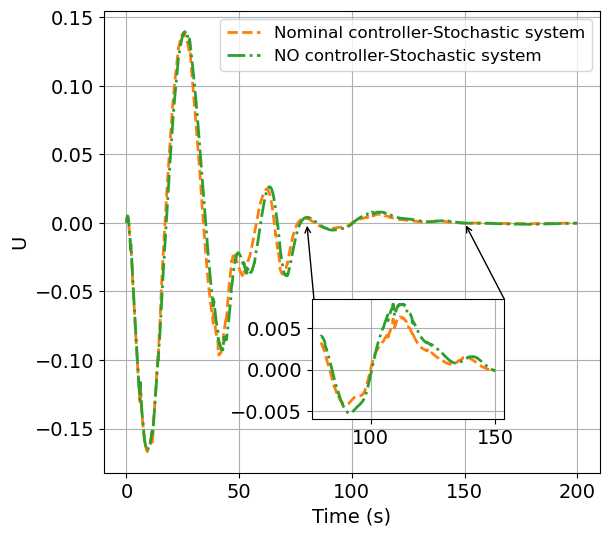

In [11]:
name = 'Compare_U'
# Actuation
fig = plt.figure(figsize=sys.figsize)
ax1 = plt.axes()
# ax1.plot(t_log, np.zeros_like(t_log), 'k', linewidth=2)
ax1.plot(t_log, U_sf_sto, sys.style2, color=sys.RGB_color2, linewidth=2,label='Nominal controller-Stochastic system')
ax1.plot(t_log, U_sf_para2K, sys.style3, color=sys.RGB_color3, linewidth=2,label = 'NO controller-Stochastic system')
ax1.xaxis.set_tick_params(labelsize=sys.fontsize)
ax1.yaxis.set_tick_params(labelsize=sys.fontsize)
plt.grid()
plt.xlabel('Time (s)',fontsize=sys.fontsize)
plt.ylabel('U',fontsize=sys.fontsize)
plt.legend(ncol=1,loc='best', fontsize=sys.fontsize_legend)
ax2 = plt.axes([0.45, 0.2, 0.3, 0.2])
ax2.plot(t_log[800:1500],U_sf_sto[800:1500], sys.style2, color=sys.RGB_color2, linewidth=2)
ax2.plot(t_log[800:1500],U_sf_para2K[800:1500], sys.style3, color=sys.RGB_color3, linewidth=2)
ax2.xaxis.set_tick_params(labelsize=sys.fontsize)
ax2.yaxis.set_tick_params(labelsize=sys.fontsize)
plt.grid()
ax1.annotate("",
            xy=(t_log[800], 0), xycoords='data',
            xytext=(0.424, 0.37), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax1.annotate("", xy=(t_log[1500], 0), xycoords='data',
             xytext=(0.81, 0.37), textcoords='axes fraction',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.savefig('image/'+name+'.pdf', dpi = 300)
plt.show()

#### Plot density and velocity(open-loop)

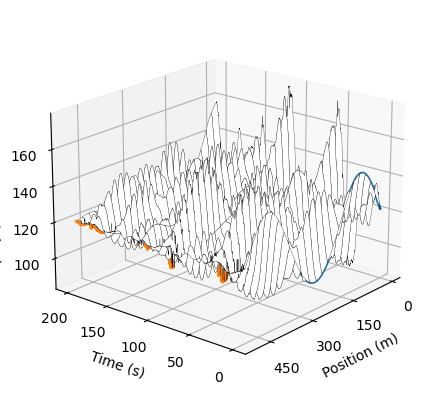

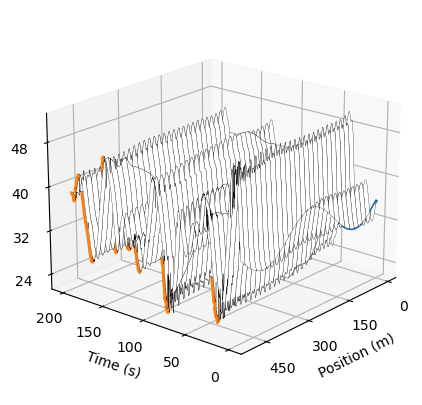

In [12]:
name = 'OL'
fig = plt.figure(figsize=[6.4, 5])
ax = fig.add_subplot(projection='3d')
X_arr, T_arr = np.meshgrid(sys.xspanT, t_log)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, T_arr, rho_sto_ol, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.plot(sys.xspanT, np.zeros_like(sys.xspanT), rho_sto_ol[0, :], color=sys.RGB_color1, linewidth=2)
ax.plot([sys.L]*len(t_log), t_log, rho_sto_ol[:, -1], color=sys.RGB_color2, linewidth=2)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Density (veh/km)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.view_init(elev=20, azim=-140)
ax.invert_xaxis()
plt.savefig('image/'+name+'_Density.pdf', dpi = 300)
plt.show()

# Velocity evolution
fig = plt.figure(figsize=[6.4, 5])
ax = fig.add_subplot(projection='3d')
X_arr, T_arr = np.meshgrid(sys.xspanT, t_log)
# ax.plot_surface(X_arr, T_arr, v, cmap='turbo')
ax.plot_surface(X_arr, T_arr, v_sto_ol, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.plot(sys.xspanT, np.zeros_like(sys.xspanT), v_sto_ol[0, :], color=sys.RGB_color1, linewidth=2)
ax.plot([sys.L]*len(t_log), t_log, v_sto_ol[:, -1], color=sys.RGB_color2, linewidth=2)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Velocity (km/h)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.invert_xaxis()
ax.view_init(elev=20, azim=-140)
plt.savefig('image/'+name+'_Velocity.pdf', dpi = 300)
plt.show()

#### Plot density and velocity(closd-loop)

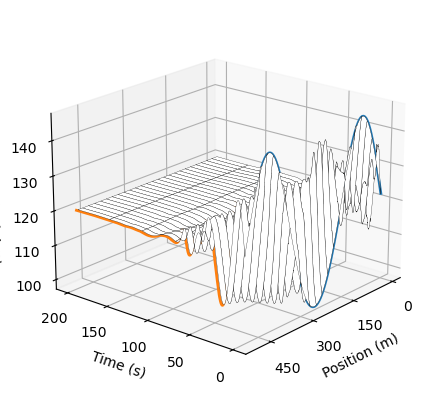

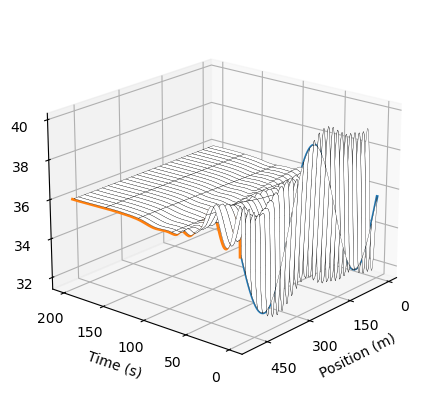

In [13]:
# Density evolution
name = 'NO'
fig = plt.figure(figsize=[6.4, 5])
ax = fig.add_subplot(projection='3d')
X_arr, T_arr = np.meshgrid(sys.xspanT, t_log)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, T_arr, rho_para2K, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.plot(sys.xspanT, np.zeros_like(sys.xspanT), rho_para2K[0, :], color=sys.RGB_color1, linewidth=2)
ax.plot([sys.L]*len(t_log), t_log, rho_para2K[:, -1], color=sys.RGB_color2, linewidth=2)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Density (veh/km)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.view_init(elev=20, azim=-140)
ax.invert_xaxis()
plt.savefig('image/'+name+'_Density.pdf', dpi = 300)
plt.show()

# Velocity evolution
fig = plt.figure(figsize=[6.4, 5])
ax = fig.add_subplot(projection='3d')
X_arr, T_arr = np.meshgrid(sys.xspanT, t_log)
# ax.plot_surface(X_arr, T_arr, v, cmap='turbo')
ax.plot_surface(X_arr, T_arr, v_para2K, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.plot(sys.xspanT, np.zeros_like(sys.xspanT), v_para2K[0, :], color=sys.RGB_color1, linewidth=2)
ax.plot([sys.L]*len(t_log), t_log, v_para2K[:, -1], color=sys.RGB_color2, linewidth=2)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Velocity (km/h)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.invert_xaxis()
ax.view_init(elev=20, azim=-140)
plt.savefig('image/'+name+'_Velocity.pdf', dpi = 300)
plt.show()

#### Plot error

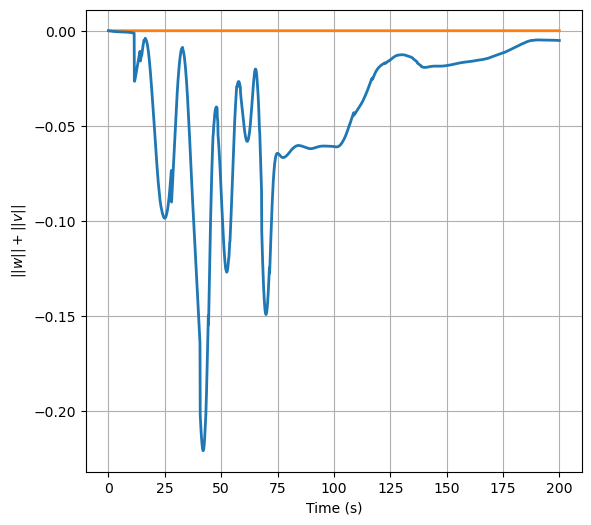

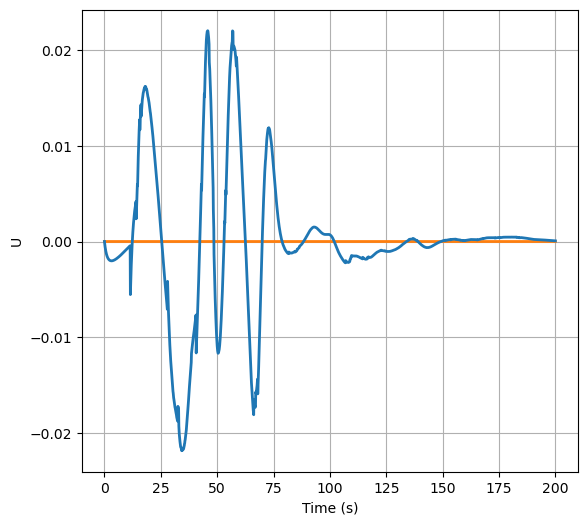

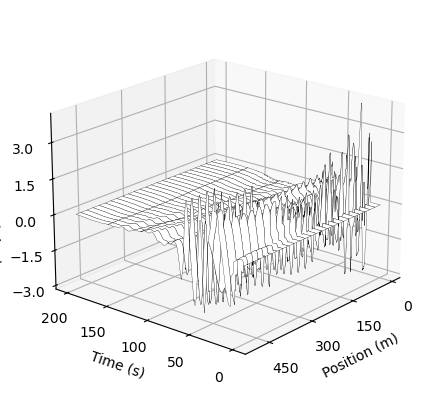

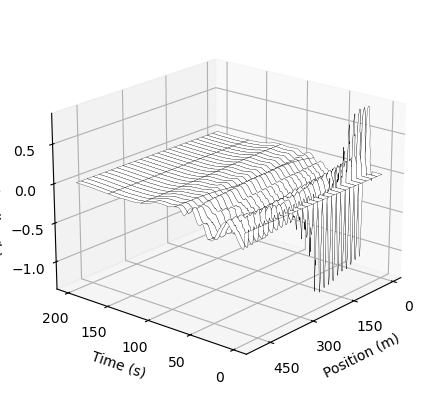

In [14]:
name = 'Error_compare'

fig = plt.figure(figsize=sys.figsize)
ax = plt.axes()
ax.plot(t_log, np.zeros_like(t_log), color = sys.RGB_color2, linewidth=2)
ax.plot(t_log, uv_sf_norm_err, sys.style1, color=sys.RGB_color1, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel(r'$||w||+||v||$')
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.grid()
plt.savefig('image/'+name+'_norm.pdf', dpi = 300)
plt.show()

fig = plt.figure(figsize=sys.figsize)
ax = plt.axes()
ax.plot(t_log, np.zeros_like(t_log), color = sys.RGB_color2, linewidth=2)
ax.plot(t_log, U_sf_err, sys.style1, color=sys.RGB_color1, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('U')
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.grid()
plt.savefig('image/'+name+'_control.pdf', dpi = 300)
plt.show()



# Density evolution
fig = plt.figure(figsize=[6.4, 5])
ax = fig.add_subplot(projection='3d')
X_arr, T_arr = np.meshgrid(sys.xspanT, t_log)
# ax.plot_surface(X_arr, T_arr, rho, cmap='turbo')
ax.plot_surface(X_arr, T_arr, rho_err, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Density (veh/km)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
ax.view_init(elev=20, azim=-140)
ax.invert_xaxis()
plt.savefig('image/'+name+'_Density.pdf', dpi = 300)
plt.show()


# Velocity evolution
fig = plt.figure(figsize=[6.4, 5])
ax = fig.add_subplot(projection='3d')
X_arr, T_arr = np.meshgrid(sys.xspanT, t_log)
# ax.plot_surface(X_arr, T_arr, v, cmap='turbo')
ax.plot_surface(X_arr, T_arr, v_err, edgecolor="black",lw=0.2, rstride=400, cstride=4, 
                        alpha=1, color="white", shade=False, rasterized=True, antialiased=True)
ax.set_xlabel('Position (m)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Velocity (km/h)')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.zaxis.set_major_locator(plt.MaxNLocator(5))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2e}'.format(x)))

ax.invert_xaxis()

ax.view_init(elev=20, azim=-140)
plt.savefig('image/'+name+'_Velocity.pdf', dpi = 300)
plt.show()

### Error statiscal index

In [15]:
error_Kvu = np.nan_to_num(error_Kvu)
error_Kvv = np.nan_to_num(error_Kvv)


In [16]:
max_rho_err = np.max(np.abs(rho_err))
max_v_err = np.max(np.abs(v_err))

print("max_rho_err: {:.4f} ".format(max_rho_err))
print("max_v_err: {:.4f} ".format(max_v_err))

mean_rho_err = np.mean(np.abs(rho_err))
mean_v_err = np.mean(np.abs(v_err))

print("mean_rho_err: {:.4f} ".format(mean_rho_err))
print("mean_v_err: {:.4f} ".format(mean_v_err))

max_kw_err = np.max(np.abs(error_Kvu))
max_kv_err = np.max(np.abs(error_Kvv))

print("max_kw_err: {:.4e}".format(max_kw_err))
print("max_kv_err: {:.4e}".format(max_kv_err))

mean_kw_err = np.mean(np.abs(error_Kvu))
mean_kv_err = np.mean(np.abs(error_Kvv))

print("mean_kw_err: {:.4e}".format(mean_kw_err))
print("mean_kv_err: {:.4e}".format(mean_kv_err))


max_rho_err: 4.0456 
max_v_err: 1.3119 
mean_rho_err: 0.2450 
mean_v_err: 0.0476 
max_kw_err: 5.9604e-05
max_kv_err: 5.9519e-05
mean_kw_err: 3.0066e-05
mean_kv_err: 2.2160e-05
